# Use Python <3.10

This package heavily utilizes the pyMuellerMat package that makes Mueller matrices from "system dictionaries" detailing the instrument configuration. Make sure to clone the physical_models branch of pyMuellerMat at https://github.com/maxwellmb/pyMuellerMat/.

In [1]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
from instruments import *
from physical_models import *

# Step 1: Write FITS Info to CSV

In [2]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes_3/cubes'
raw_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Raw_3/internal-cal'

# Write all bins to csvs
for bin in range(0,22):
   csv_filepath = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
   write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin0.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin1.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin2.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin3.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin4.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin5.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin6.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin7.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cu

# Step 2 (Optional): Split Up Your Data

In [7]:
# This is specific to what I'm fitting
# I'm going to split the csvs in half because one half has the pickoff in and the other half has it out

# sort csvs into with and without pickoff
def split_csv(file_path):
    file_path = Path(file_path)
    if not file_path.exists() or file_path.suffix != ".csv":
        raise ValueError("Please provide a valid .csv file.")

    # Read original CSV
    df = pd.read_csv(file_path)

    # Split into two DataFrames
    df_with_pickoff = df.iloc[72:].reset_index(drop=True)
    df_no_pickoff = df.iloc[:72].reset_index(drop=True)

    # Create new file names
    stem = file_path.stem  # without .csv
    suffix = file_path.suffix
    parent = file_path.parent
    nopickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff')
    pickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff')
    with_pickoff_path = pickoff_folder / f"{stem}_with_pickoff{suffix}"
    no_pickoff_path = nopickoff_folder / f"{stem}_no_pickoff{suffix}"

    # Save the new CSVs
    df_no_pickoff.to_csv(no_pickoff_path, index=False)
    df_with_pickoff.to_csv(with_pickoff_path, index=False)

    print(f"Saved: {no_pickoff_path}")
    print(f"Saved: {with_pickoff_path}")

# split all csvs
for bin in range(0,22):
     csv_path = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
     split_csv(csv_path)

Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin0_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin0_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin1_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin1_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin2_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin2_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin3_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin3_with_pickoff.csv
Saved: /Users/thomasmcintosh/Des

# Step 3 (Optional): Plot Your Data With the Original Model 

In [2]:
# Define a csv filepath that we just created from whatever wavelength bin you want to visualize
# I have bin 15 here, I would recommend using a bin in the middle to get a good idea,
# bin zero can be finicky
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin15_with_pickoff.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  144
[-5.22213279e-01  4.02450338e+08 -3.91877275e-01  4.00912593e+08
 -2.46134292e-02  3.98605969e+08  3.77378452e-01  3.98571117e+08
  5.86235703e-01  4.00370202e+08]
Interleaved Stds
Length:  144
[4.25107378e-05 2.00611649e+04 4.59484896e-05 2.00228018e+04
 5.00721811e-05 1.99651188e+04 4.63858804e-05 1.99642460e+04
 4.04882954e-05 2.00092529e+04]
Configuration List
Length:  72
[{'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 11.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 33.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 56.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 78.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 90.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'th

In [3]:

# Define wavelength bins for CHARIS

wavelength_bins = np.array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
2139.4131, 2213.4641, 2290.0781, 2369.3441])

# Loading in past fits from Joost t Hart 2021

offset_imr = -0.0118 # derotator offset
offset_hwp = -0.002 # HWP offset
offset_cal = -0.035 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"delta_theta": offset_cal },
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)
print(system_mm.evaluate())



[[ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [50]:
system_dict2 = {
            "components" : {
                "wollaston" : {
                "type" : "wollaston_prism_function",
                "properties" : {"beam": 'e'}, 
                "tag": "internal",
                },
                "pickoff" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi": 0, "delta_theta":45 },
                    "tag": "internal",
                },                
                "image_rotator" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi": 2.2, "theta": 45, "delta_theta": 0.4},
                    "tag": "internal",
                },
                "hwp" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi": 2.4, "theta": 0, "delta_theta": 0.1},
                    "tag": "internal",
                },
                "lp" : {  # calibration polarizer for internal calibration source
                    "type": "diattenuator_retarder_function",
                    "properties": {"epsilon": 1, "delta_theta": -0.2 },
                    "tag": "internal",
                }}
        }

test_mm = generate_system_mueller_matrix(system_dict2)
test_mm.evaluate()


array([[ 0.7970533 ,  0.79703388, -0.00556444,  0.        ],
       [-0.7970533 , -0.79703388,  0.00556444,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

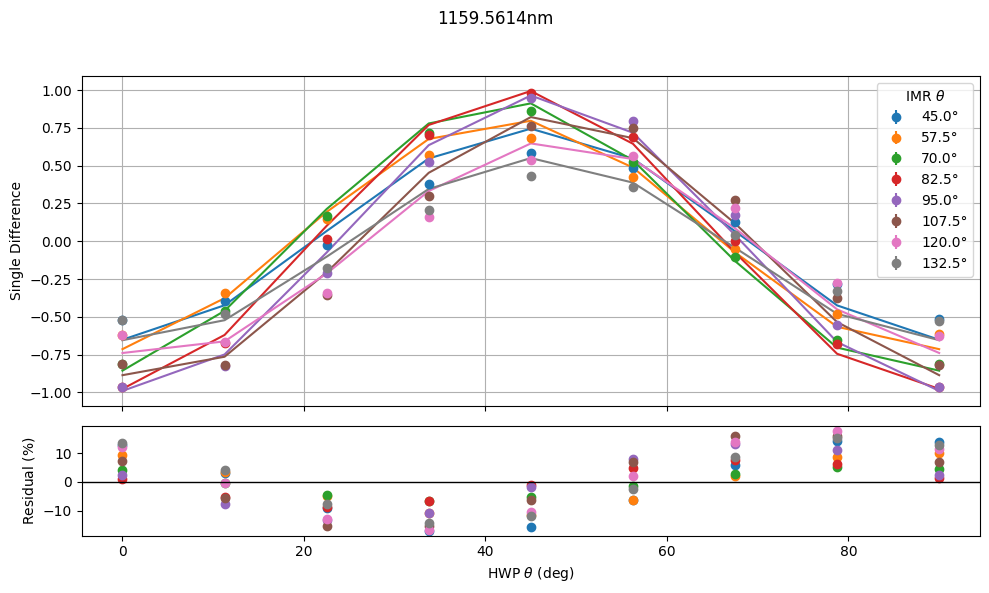

Residuals range: -0.17031000988755746 0.17747719067035173


In [4]:

# Get our model retardances from Joost t Hart physical models

p = [HWP_retardance(wavelength_bins)[15], IMR_retardance(wavelength_bins)[15]]


# Gefine what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# Generate our modeled left and right beam intensities

LR_intensities = model(p, system_parameters, system_mm, configuration_list)

# Process these into interleaved single norm differences and sums

diffs_sums = process_model(LR_intensities, 'CHARIS')

# Plot the modeled and observed values

plot_data_and_model(interleaved_values, interleaved_stds, diffs_sums,configuration_list, wavelength= wavelength_bins[0], mode='CHARIS')

# Print residuals (will be useful later to see if your fit improved at a quick glance)
residuals = interleaved_values[::2] - diffs_sums[::2]
print("Residuals range:", residuals.min(), residuals.max())


In [11]:
general_retarder_function(phi=1)

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.54030231,  0.84147098],
       [ 0.        ,  0.        , -0.84147098,  0.54030231]])

# Step 4: Fit New Model

I made a function that does everything quickly but is also tailored to the parameters I am fitting. My function updates the model, puts the pyMuellerMat compatible system dictionary in a JSON file, and optionally saves a plot of the model vs data to a specified path.
If you want to use it for different parameters than the ones detailed in the docstring, 
you'll have to update the function a bit (which shouldn't take too long). 

NOTE: I am only fitting for the retardances and lp diattenuation here, not the offsets, to preserve correct errors. Previously, I did this same fitting procedure including the offsets, and their values were extremeley consistent across wavelength bins (std ~10^-13). I fixed these averages for the offset angles. For unknown reasons, when I did that first fit the errors were nonsensical for the offsets. 

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4437e+08                                    3.66e+02    
       1              2         1.4437e+08      1.30e+03       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.4437e+08, final cost 1.4437e+08, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-3.536e+03 -2.052e+03 ... -2.528e+03 -3.464e+03]
           x: [ 0.000e+00]
        cost: 144365864.6154139
         jac: [[ 1.014e+00]
               [ 7.590e-01]
               ...
               [-6.169e-01]
               [-1.031e+00]]
        grad: [ 8.212e+03]
  optimality: 0.0
 active_mask: [-1]
        nfev: 2
        njev: 2
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4437e+08   

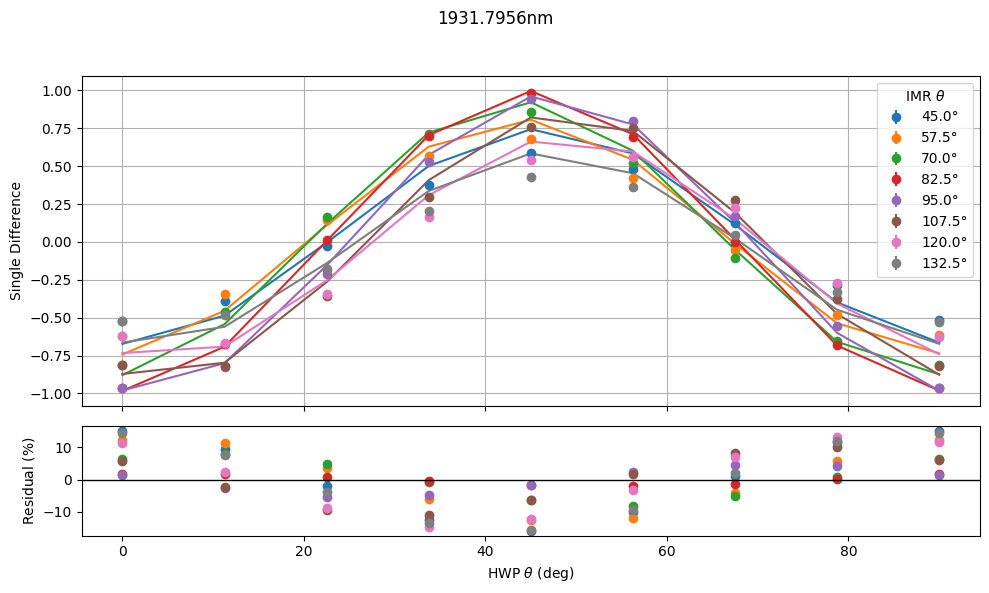

Updated Mueller Matrix:
[[ 0.16385652  0.16383352  0.00274531  0.        ]
 [-0.16385652 -0.16383352 -0.00274531  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1583395045428233 0.1513880928958442
Error: [311.0949172]


array([311.0949172])

In [3]:
# Test fitting with the wavelength bin we plotted earlier

fit_CHARIS_Mueller_matrix_by_bin(filepath, 15, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_with_pickoff_cal/test.json'),
    plot_path=Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_with_pickoff_cal/test.png'),)



Looks like our model improved! Note that the Joost't Hart paper used a more elaborate physical model, which I will incorporate later. These fits are a good starting point for more detailed models. Now we can fit for all bins and collect the errors.

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8443e+06                                    4.81e+01    
       1              2         5.8443e+06      1.54e+01       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 5.8443e+06, final cost 5.8443e+06, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 6.972e+01  1.072e+02 ...  2.638e+02  1.604e+02]
           x: [ 0.000e+00]
        cost: 5844254.255323162
         jac: [[-1.699e-01]
               [-1.313e-01]
               ...
               [ 1.175e-01]
               [ 1.711e-01]]
        grad: [ 5.373e+01]
  optimality: 0.0
 active_mask: [-1]
        nfev: 2
        njev: 2
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8443e+06   

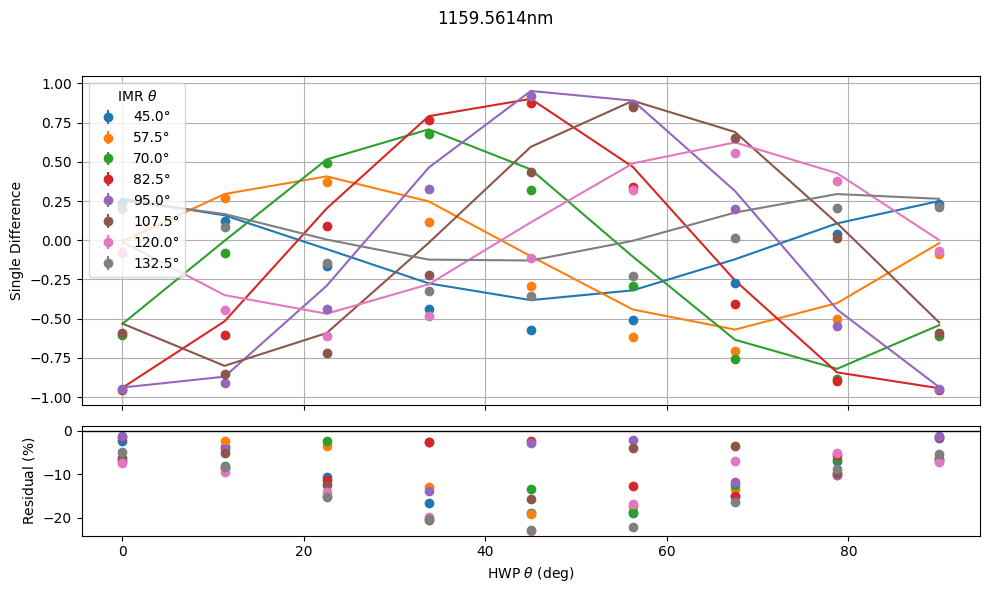

Updated Mueller Matrix:
[[ 0.63208501  0.63199629  0.01059019  0.        ]
 [-0.63208501 -0.63199629 -0.01059019  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.23041170694081353 -0.012127214690788368
Error: [335.10297141]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6708e+06                                    2.92e+02    
       1              2         1.6708e+06      6.62e+01       3.00e-01       1.46e+02    
       2              4         1.6708e+06      1.61e+01       1.50e-01       6.81e+01    
       3              5         1.6708e+06      4.25e+00       1.50e-01       1.17e+01    
       4              7         1.6708e+06      6.21e-02       3.75e-02       8.31e+00    
       5              8         1.6708e+06      5.48e-02       9.37e-03       3.40e+00    
       6              9         1.6708e+06      7.92

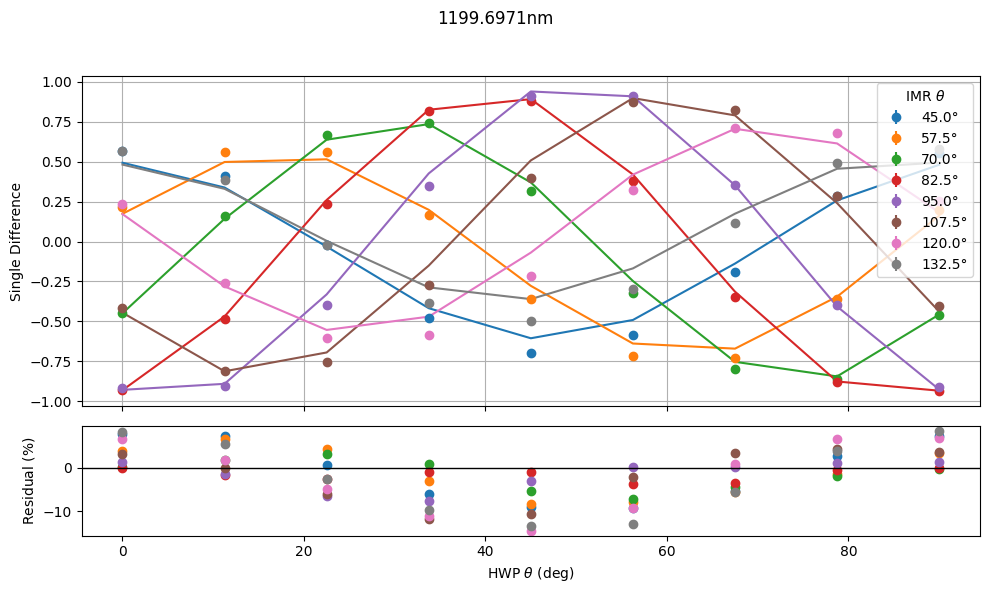

Updated Mueller Matrix:
[[ 0.74711507  0.7470102   0.01251745  0.        ]
 [-0.74711507 -0.7470102  -0.01251745  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14525487327943698 0.08451717527418584
Error: [239.35437115]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3513e+06                                    5.74e+02    
       1              2         1.3512e+06      1.45e+02       3.00e-01       3.84e+02    
       2              3         1.3511e+06      9.40e+01       6.00e-01       8.02e+01    
       3              5         1.3511e+06      3.02e+00       1.50e-01       4.00e+01    
       4              7         1.3511e+06      9.35e-01       3.75e-02       9.79e+00    
       5              9         1.3511e+06      5.79e-02       9.37e-03       2.41e+00    
       6             11         1.3511e+06      3.46e-

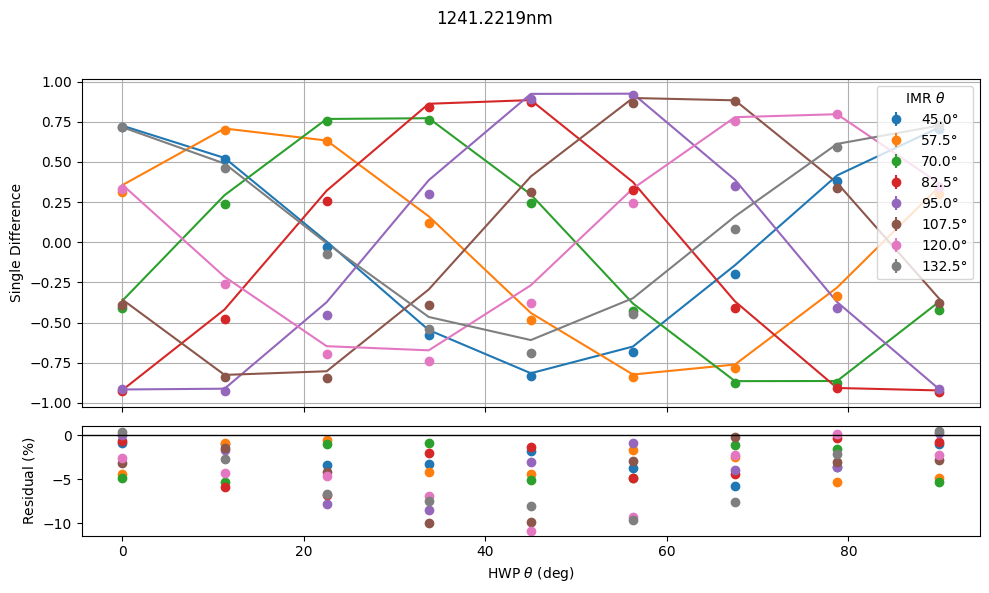

Updated Mueller Matrix:
[[ 0.86325914  0.86313797  0.01446337  0.        ]
 [-0.86325914 -0.86313797 -0.01446337  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1085492774397595 0.00460257621016491
Error: [176.45607751]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2144e+06                                    5.84e+02    
       1              2         2.2143e+06      1.39e+02       3.00e-01       3.38e+02    
       2              3         2.2143e+06      3.71e+01       6.00e-01       2.19e+02    
       3              4         2.2142e+06      2.24e+01       1.50e-01       7.89e+01    
       4              5         2.2142e+06      1.21e+00       1.50e-01       6.28e+01    
       5              6         2.2142e+06      1.69e+00       3.75e-02       2.75e+01    
       6              7         2.2142e+06      3.63e-0

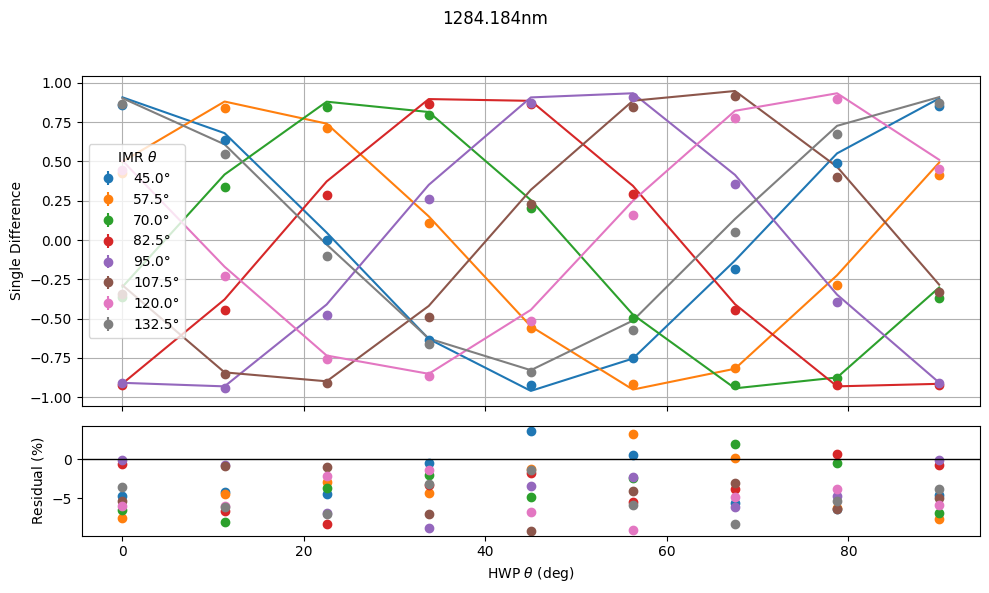

Updated Mueller Matrix:
[[ 0.95448319  0.95434921  0.01599177  0.        ]
 [-0.95448319 -0.95434921 -0.01599177  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.09152318355542463 0.03684471808114309
Error: [201.10158196]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.9623e+06                                    1.20e+02    
       1              2         3.9623e+06      1.22e+01       3.00e-01       3.97e+01    
       2              4         3.9623e+06      1.46e+00       7.50e-02       4.88e-01    
       3              8         3.9623e+06      4.38e-04       1.17e-03       4.30e-01    
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 3.9623e+06, final cost 3.9623e+06, first-order optimality 4.30e-01.
     message: `ftol` termination condition is satisfied.
     success: True
      status

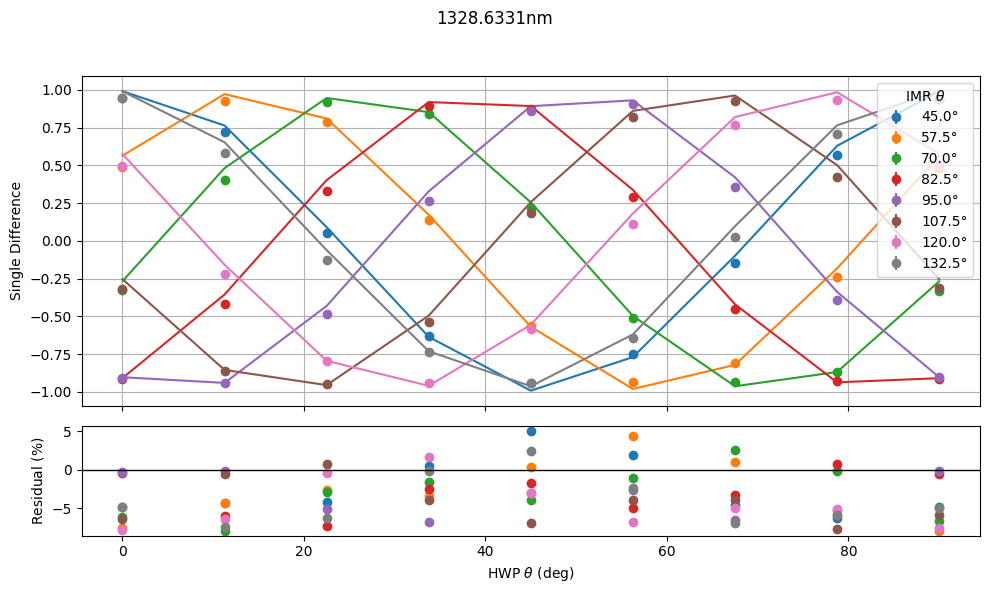

Updated Mueller Matrix:
[[ 0.99667137  0.99653147  0.01669861  0.        ]
 [-0.99667137 -0.99653147 -0.01669861  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.07884503515045471 0.05053678193335065
Error: [322.20776469]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.6863e+07                                    2.76e+03    
       1              2         2.6862e+07      8.25e+02       3.00e-01       2.70e+03    
       2              3         2.6861e+07      1.42e+03       6.00e-01       1.89e+03    
       3              4         2.6860e+07      4.71e+02       1.20e+00       1.20e+03    
       4              5         2.6860e+07      2.43e+02       3.00e-01       4.12e+02    
       5              7         2.6860e+07      2.31e+01       7.50e-02       2.05e+02    
       6              8         2.6860e+07      7.63e+

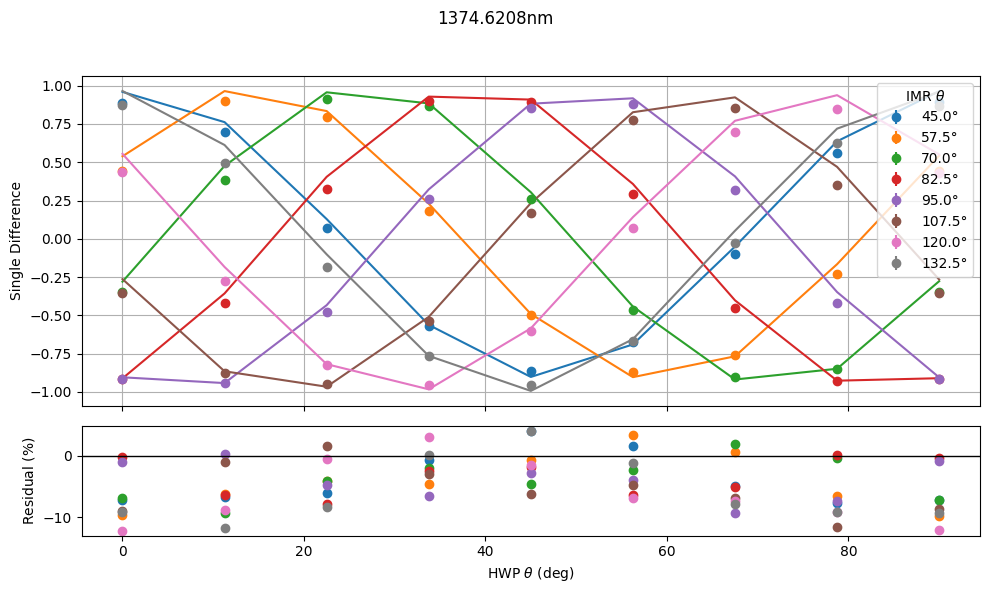

Updated Mueller Matrix:
[[ 0.98029079  0.98015319  0.01642416  0.        ]
 [-0.98029079 -0.98015319 -0.01642416  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.12151596562415157 0.040034952153866765
Error: [226.11569035]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1790e+07                                    2.35e+03    
       1              2         1.1789e+07      6.79e+02       3.00e-01       2.14e+03    
       2              3         1.1788e+07      1.03e+03       6.00e-01       1.18e+03    
       3              5         1.1788e+07      2.57e+02       3.00e-01       5.18e+02    
       4              6         1.1788e+07      4.93e+01       3.00e-01       1.92e+02    
       5              8         1.1788e+07      7.68e+00       7.50e-02       1.30e+01    
       6             11         1.1788e+07      3.66e

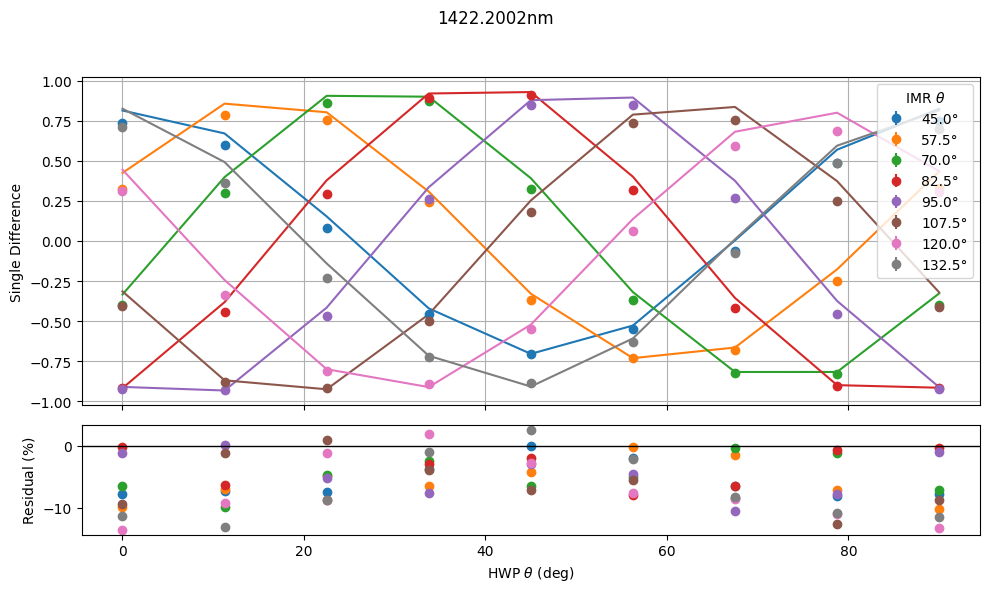

Updated Mueller Matrix:
[[ 0.90743567  0.90730829  0.01520352  0.        ]
 [-0.90743567 -0.90730829 -0.01520352  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1357388876795556 0.024804885141053168
Error: [220.86706675]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.2546e+06                                    2.40e+03    
       1              2         6.2539e+06      7.03e+02       3.00e-01       2.25e+03    
       2              3         6.2527e+06      1.13e+03       6.00e-01       1.39e+03    
       3              4         6.2527e+06      3.93e+01       1.20e+00       1.33e+03    
       4              5         6.2524e+06      3.03e+02       3.00e-01       6.76e+02    
       5              7         6.2523e+06      7.52e+01       1.50e-01       3.25e+02    
       6              8         6.2523e+06      2.18e+

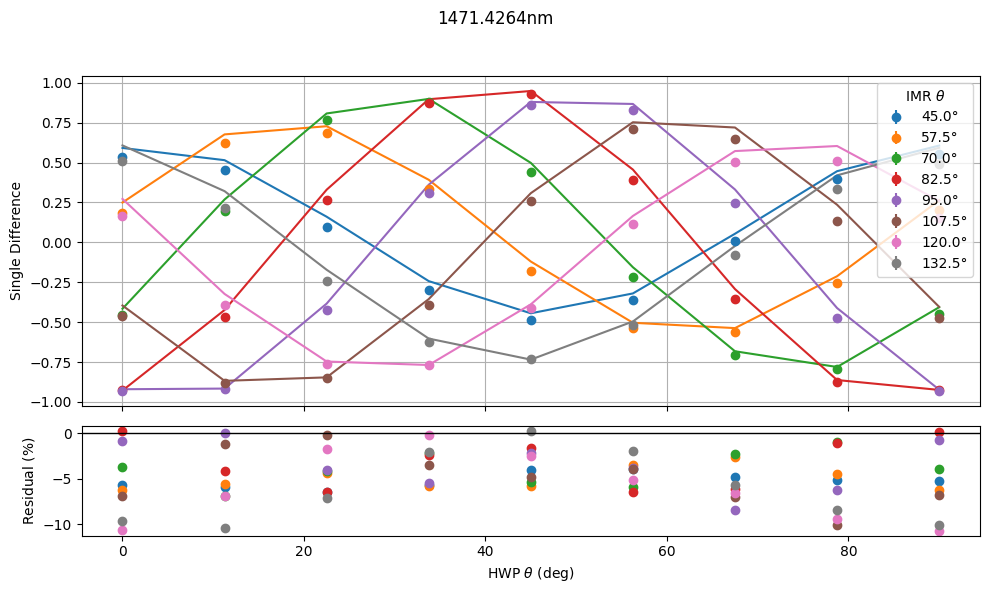

Updated Mueller Matrix:
[[ 0.79634994  0.79623816  0.01334235  0.        ]
 [-0.79634994 -0.79623816 -0.01334235  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1068385379440411 0.0024919346553956556
Error: [193.47264696]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.3768e+06                                    2.26e+03    
       1              2         5.3761e+06      6.64e+02       3.00e-01       2.14e+03    
       2              3         5.3750e+06      1.08e+03       6.00e-01       1.35e+03    
       3              4         5.3749e+06      9.76e+01       1.20e+00       1.20e+03    
       4              5         5.3747e+06      2.70e+02       3.00e-01       5.84e+02    
       5              6         5.3746e+06      7.52e+01       3.00e-01       8.63e+01    
       6              8         5.3746e+06      1.25e

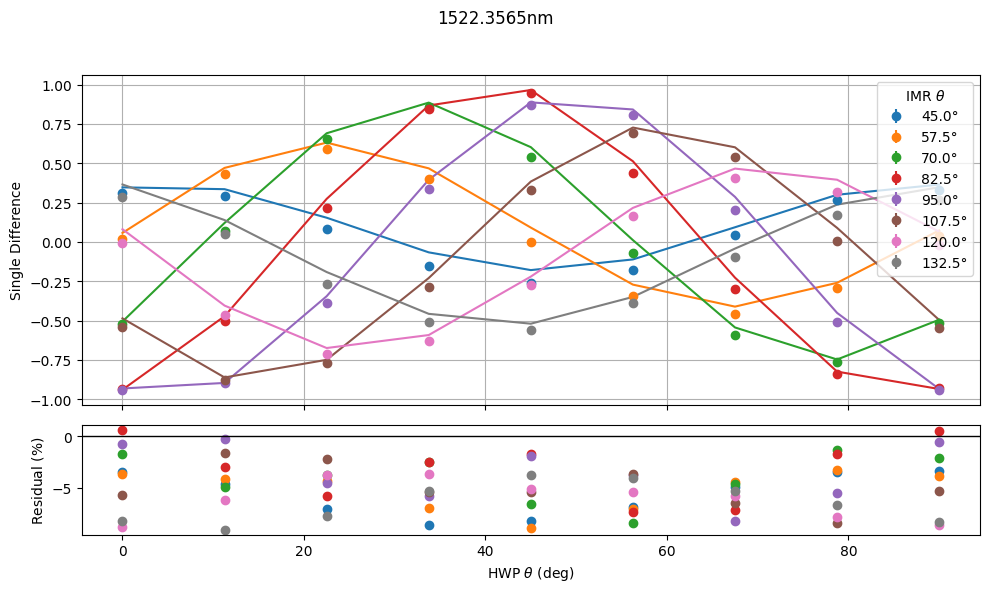

Updated Mueller Matrix:
[[ 0.67369193  0.67359737  0.01128729  0.        ]
 [-0.67369193 -0.67359737 -0.01128729  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.09064023914184577 0.006265723037556792
Error: [201.53949575]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.4098e+06                                    2.00e+03    
       1              2         6.4092e+06      5.97e+02       3.00e-01       1.95e+03    
       2              3         6.4082e+06      1.01e+03       6.00e-01       1.33e+03    
       3              4         6.4079e+06      2.81e+02       1.20e+00       9.18e+02    
       4              5         6.4077e+06      1.92e+02       3.00e-01       3.50e+02    
       5              6         6.4077e+06      1.53e+01       3.00e-01       2.49e+02    
       6              7         6.4077e+06      1.30e

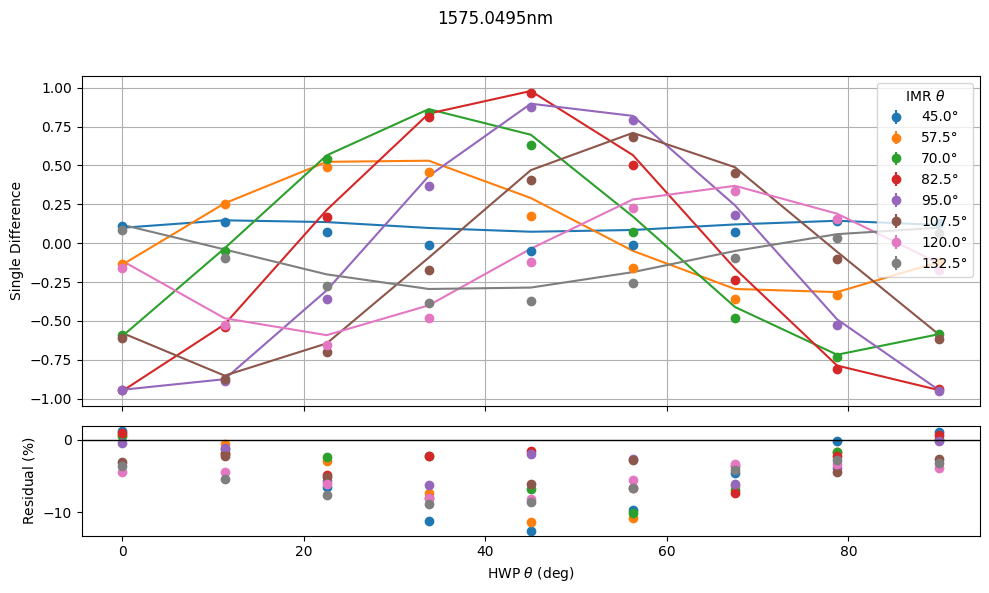

Updated Mueller Matrix:
[[ 0.54966887  0.54959172  0.00920936  0.        ]
 [-0.54966887 -0.54959172 -0.00920936  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.12550574880235185 0.012313344410017885
Error: [198.95701945]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.6463e+06                                    1.80e+03    
       1              2         7.6457e+06      5.70e+02       3.00e-01       1.97e+03    
       2              3         7.6446e+06      1.17e+03       6.00e-01       1.80e+03    
       3              4         7.6434e+06      1.12e+03       1.20e+00       1.56e+02    
       4              7         7.6434e+06      6.09e+00       7.50e-02       6.66e+00    
       5             10         7.6434e+06      7.89e-03       4.69e-03       3.08e+00    
`ftol` termination condition is satisfied.
Function e

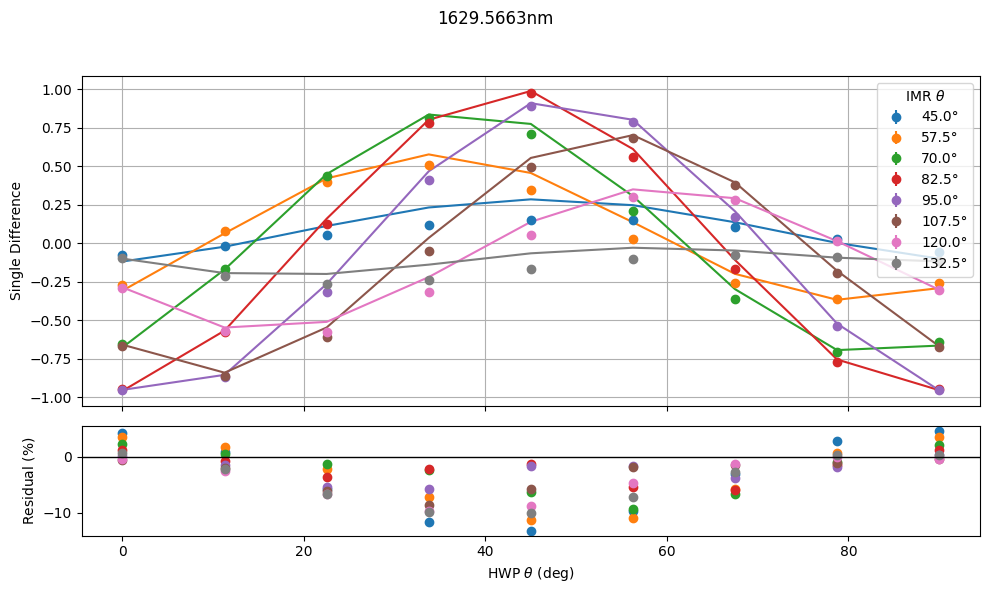

Updated Mueller Matrix:
[[ 0.44047888  0.44041705  0.00737995  0.        ]
 [-0.44047888 -0.44041705 -0.00737995  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.13198645647751217 0.04578925531230597
Error: [165.04480837]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.9011e+06                                    1.21e+03    
       1              2         9.9007e+06      4.25e+02       3.00e-01       1.61e+03    
       2              3         9.8996e+06      1.10e+03       6.00e-01       1.95e+03    
       3              4         9.8978e+06      1.82e+03       1.20e+00       7.07e+02    
       4              5         9.8978e+06      4.30e-01       7.42e-01       7.06e+02    
       5              6         9.8977e+06      9.90e+01       1.85e-01       3.59e+02    
       6              8         9.8976e+06      2.50e+

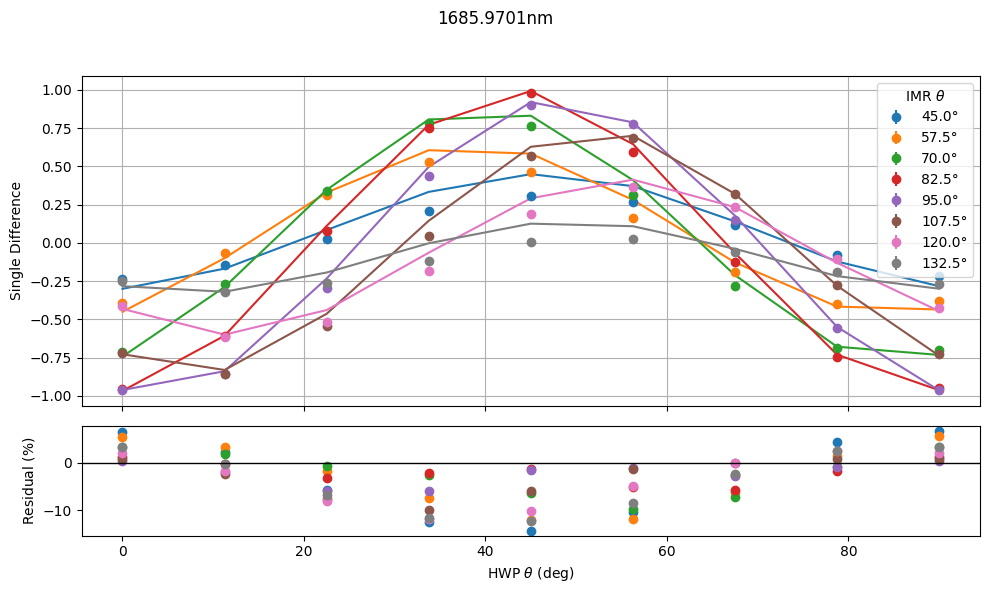

Updated Mueller Matrix:
[[ 0.35014376  0.35009461  0.00586644  0.        ]
 [-0.35014376 -0.35009461 -0.00586644  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1438168263231857 0.06788362282465676
Error: [167.69636176]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6094e+07                                    4.42e+02    
       1              2         1.6094e+07      2.40e+02       3.00e-01       1.15e+03    
       2              3         1.6093e+07      1.03e+03       6.00e-01       2.19e+03    
       3              4         1.6090e+07      2.80e+03       1.20e+00       1.89e+03    
       4              5         1.6089e+07      8.51e+02       7.42e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 5, initial cost 1.6094e+07, final cost 1.6089e+07, first-order optimality 0.00e+00

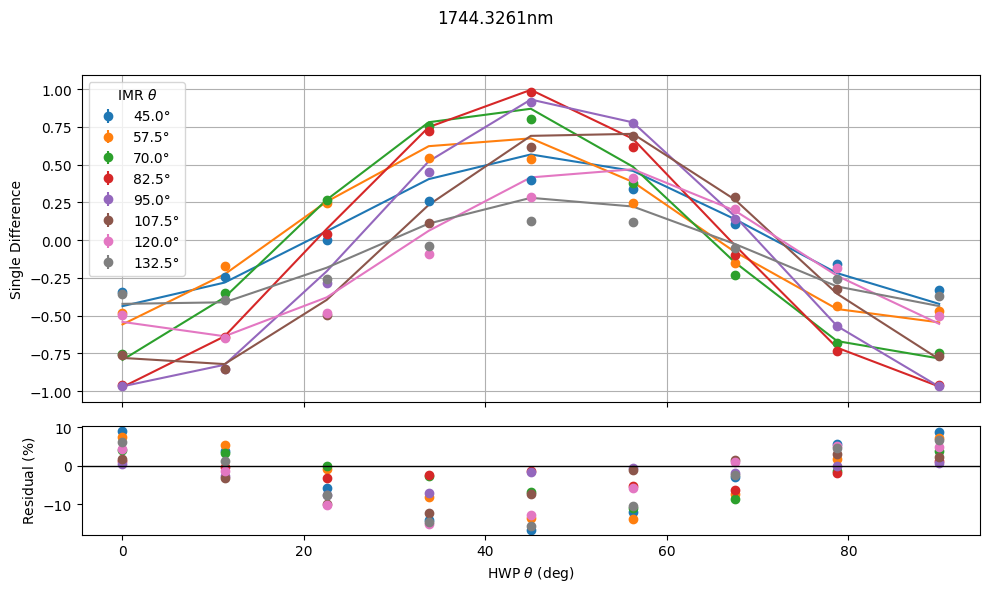

Updated Mueller Matrix:
[[ 0.28164416  0.28160462  0.00471877  0.        ]
 [-0.28164416 -0.28160462 -0.00471877  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16663766795769497 0.09137940149177459
Error: [213.40064011]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.2400e+07                                    1.37e+03    
       1              2         5.2400e+07      7.45e+02       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 5.2400e+07, final cost 5.2400e+07, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-1.367e+03 -5.054e+02 ... -6.527e+02 -1.116e+03]
           x: [ 0.000e+00]
        cost: 52399624.64625803
         jac: [[ 7.056e-01]
               [ 5.378e-01]

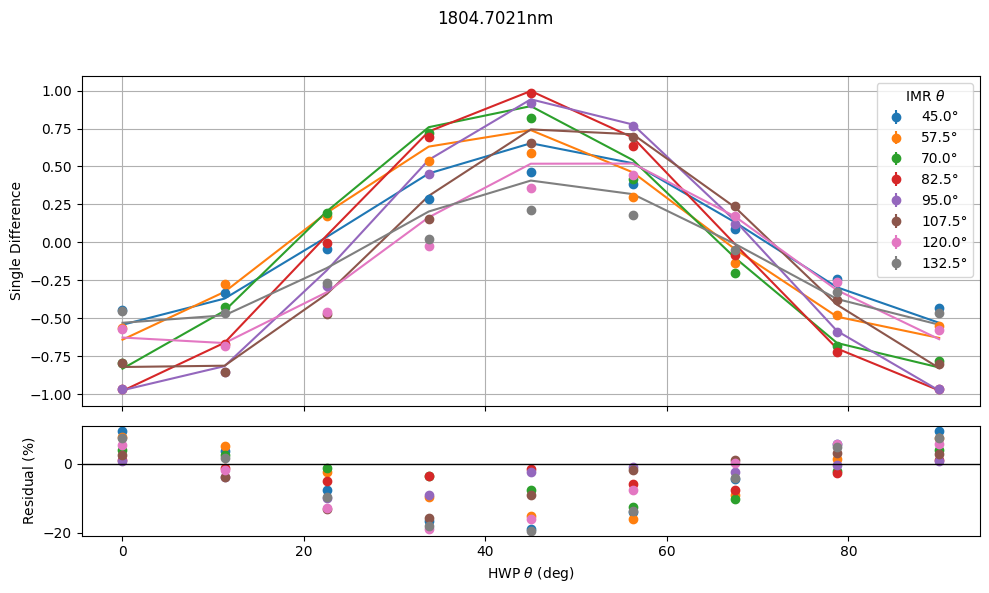

Updated Mueller Matrix:
[[ 0.22902614  0.22899399  0.00383719  0.        ]
 [-0.22902614 -0.22899399 -0.00383719  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1935845498793835 0.0962109634941285
Error: [268.46779898]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.5605e+08                                    4.93e+03    
       1              2         2.5605e+08      3.55e+03       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 2.5605e+08, final cost 2.5605e+08, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-3.800e+03 -1.720e+03 ... -2.302e+03 -3.490e+03]
           x: [ 0.000e+00]
        cost: 256045345.19225132
         jac: [[ 1.524e+00]
               [ 1.150e+00]


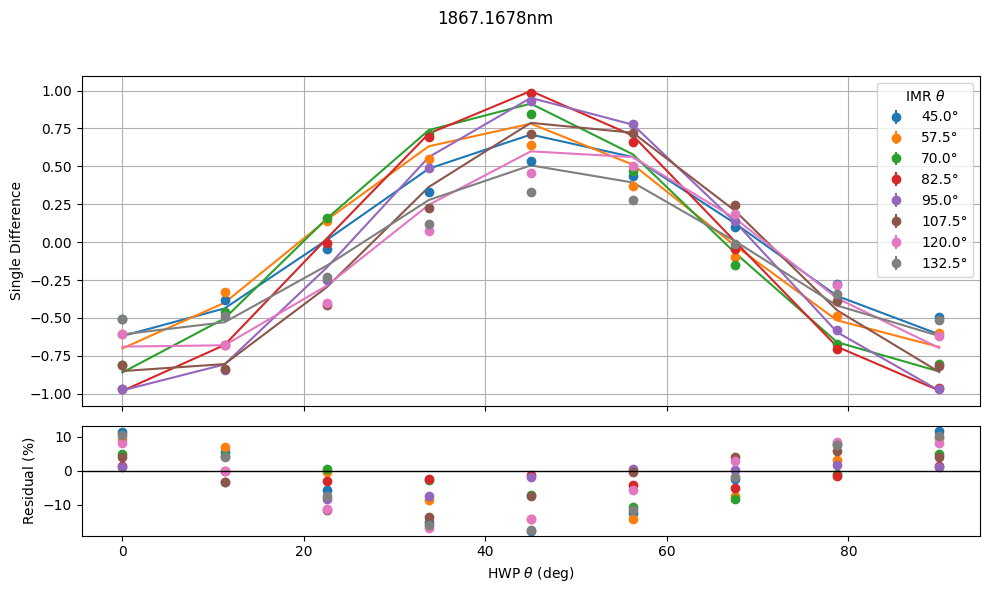

Updated Mueller Matrix:
[[ 0.19077797  0.19075119  0.00319637  0.        ]
 [-0.19077797 -0.19075119 -0.00319637  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1768051054701204 0.11749950707327306
Error: [277.51714547]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4437e+08                                    3.66e+02    
       1              2         1.4437e+08      1.30e+03       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.4437e+08, final cost 1.4437e+08, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-3.536e+03 -2.052e+03 ... -2.528e+03 -3.464e+03]
           x: [ 0.000e+00]
        cost: 144365864.6154139
         jac: [[ 1.014e+00]
               [ 7.590e-01]


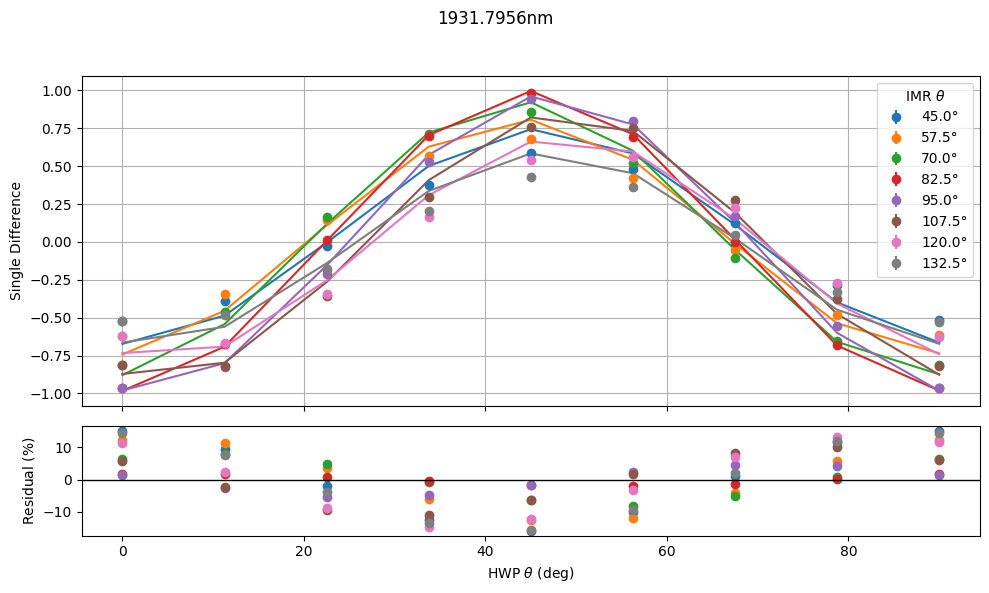

Updated Mueller Matrix:
[[ 0.16385652  0.16383352  0.00274531  0.        ]
 [-0.16385652 -0.16383352 -0.00274531  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1583395045428233 0.1513880928958442
Error: [311.0949172]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2923e+08                                    1.81e+03    
       1              2         1.2923e+08      1.54e+03       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.2923e+08, final cost 1.2923e+08, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-3.225e+03 -1.797e+03 ... -2.265e+03 -3.275e+03]
           x: [ 0.000e+00]
        cost: 129230211.14982021
         jac: [[ 8.581e-01]
               [ 6.349e-01]
 

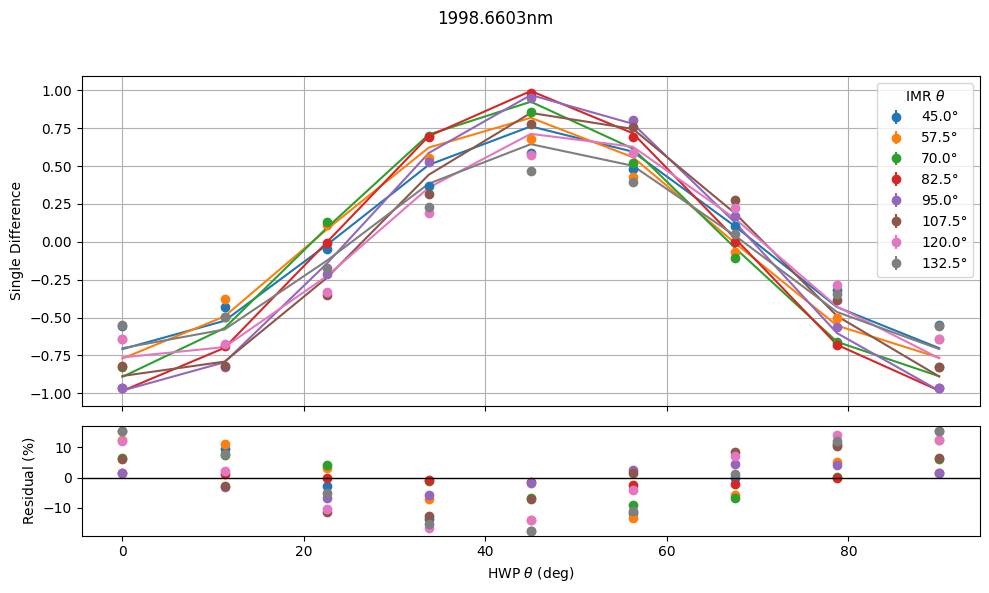

Updated Mueller Matrix:
[[ 0.14594247  0.14592198  0.00244518  0.        ]
 [-0.14594247 -0.14592198 -0.00244518  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.17643777961478724 0.15538371434008336
Error: [352.57042293]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3089e+08                                    1.65e+03    
       1              2         1.3089e+08      1.44e+03       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.3089e+08, final cost 1.3089e+08, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-3.287e+03 -1.914e+03 ... -2.438e+03 -3.448e+03]
           x: [ 0.000e+00]
        cost: 130887822.8430515
         jac: [[ 7.822e-01]
               [ 5.718e-01]

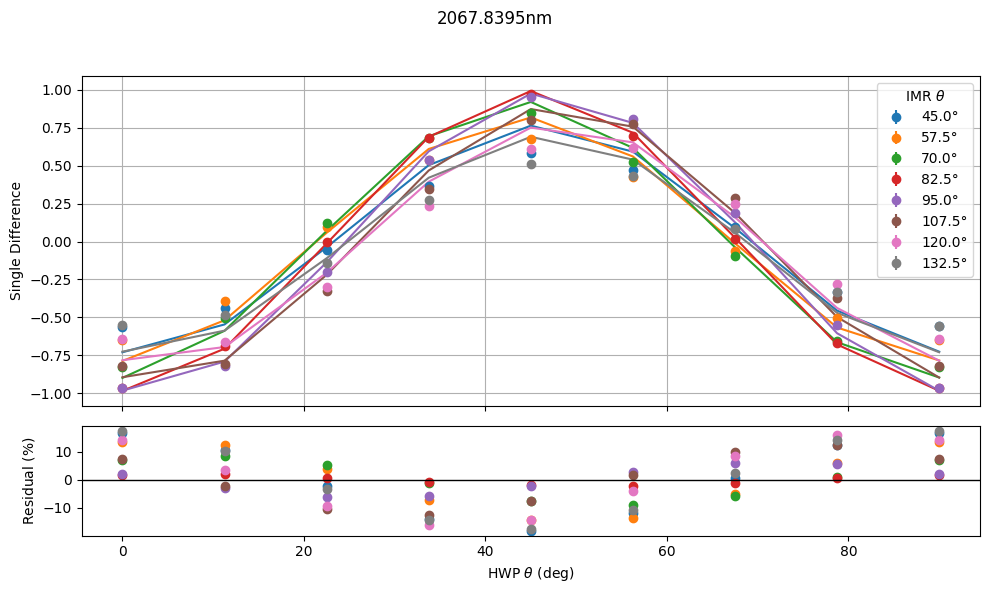

Updated Mueller Matrix:
[[ 0.13494737  0.13492842  0.00226096  0.        ]
 [-0.13494737 -0.13492842 -0.00226096  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.18190506509278803 0.1745596377358929
Error: [390.72663087]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1156e+08                                    1.06e+03    
       1              2         1.1155e+08      1.05e+03       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.1156e+08, final cost 1.1155e+08, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-2.993e+03 -1.764e+03 ... -2.273e+03 -3.225e+03]
           x: [ 0.000e+00]
        cost: 111554231.31279424
         jac: [[ 6.832e-01]
               [ 4.916e-01]

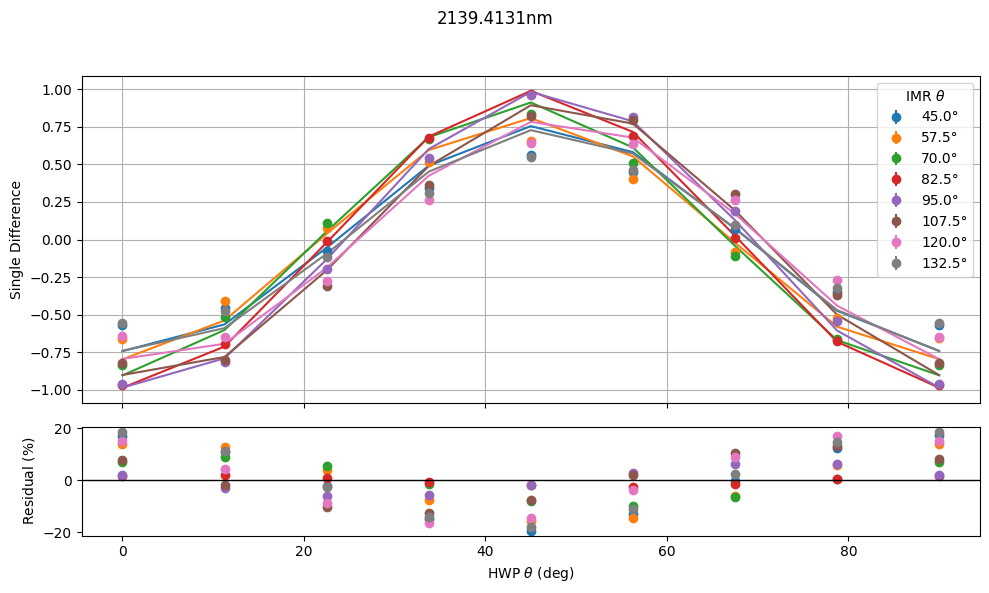

Updated Mueller Matrix:
[[ 0.12935519  0.12933703  0.00216727  0.        ]
 [-0.12935519 -0.12933703 -0.00216727  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1940928263668431 0.18561303424227626
Error: [415.20316656]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1260e+08                                    7.83e+02    
       1              2         1.1260e+08      8.17e+02       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.1260e+08, final cost 1.1260e+08, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-3.144e+03 -2.075e+03 ... -2.557e+03 -3.427e+03]
           x: [ 0.000e+00]
        cost: 112602001.95849001
         jac: [[ 5.992e-01]
               [ 4.281e-01]

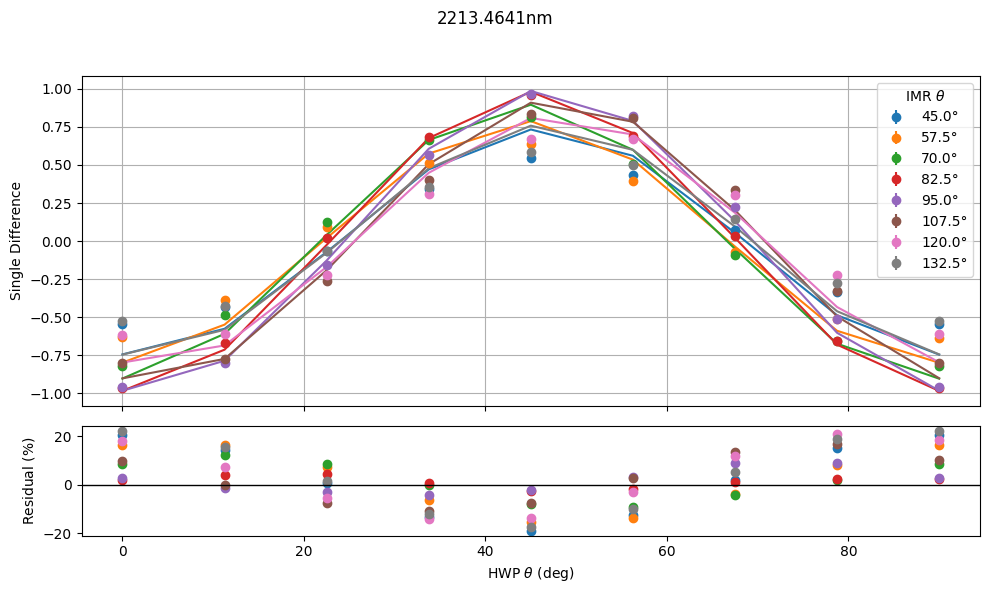

Updated Mueller Matrix:
[[ 0.1272724   0.12725453  0.00213237  0.        ]
 [-0.1272724  -0.12725453 -0.00213237  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.18937803175993628 0.22251747420861767
Error: [468.62509545]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.3756e+07                                    8.76e+00    
       1              2         8.3756e+07      4.10e+02       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 8.3756e+07, final cost 8.3756e+07, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-2.521e+03 -1.567e+03 ... -1.968e+03 -2.804e+03]
           x: [ 0.000e+00]
        cost: 83755586.7137268
         jac: [[ 5.272e-01]
               [ 3.697e-01]


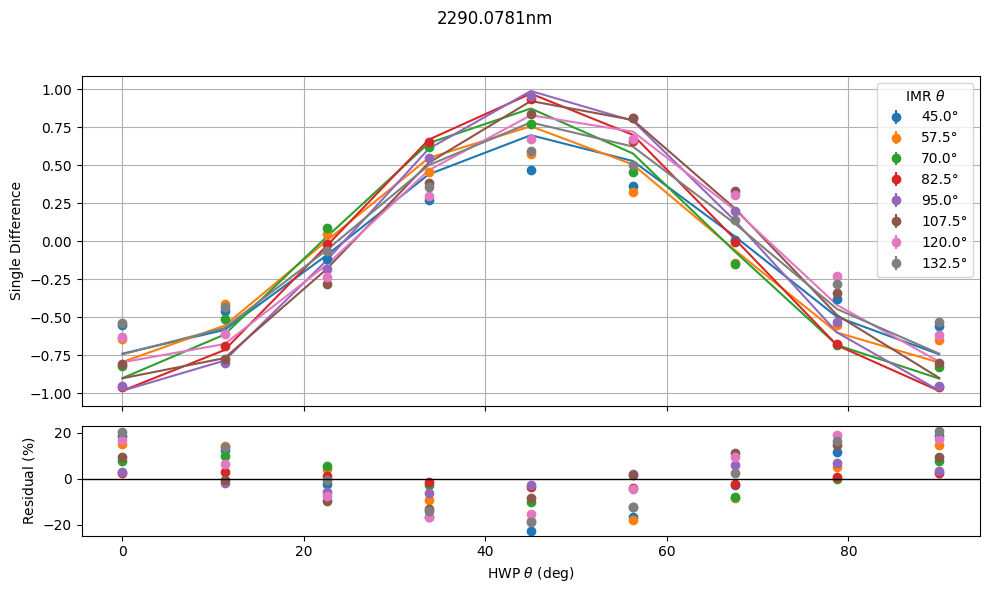

Updated Mueller Matrix:
[[ 0.12995792  0.12993968  0.00217736  0.        ]
 [-0.12995792 -0.12993968 -0.00217736  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.22710326166586803 0.20901465110915785
Error: [469.97844167]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0577e+08                                    2.18e+03    
       1              2         1.0577e+08      9.32e+02       3.00e-01       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.0577e+08, final cost 1.0577e+08, first-order optimality 0.00e+00.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-3.067e+03 -2.392e+03 ... -2.802e+03 -3.344e+03]
           x: [ 0.000e+00]
        cost: 105773248.70455395
         jac: [[ 4.083e-01]
               [ 2.874e-01

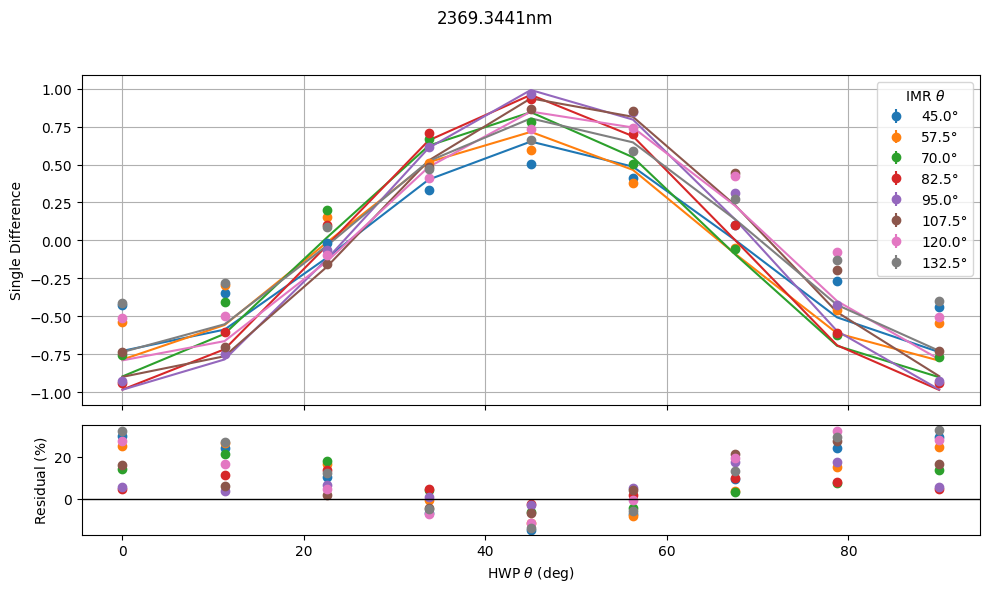

Updated Mueller Matrix:
[[ 0.13577358  0.13575453  0.0022748   0.        ]
 [-0.13577358 -0.13575453 -0.0022748   0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1479112144749376 0.3287373166950029
Error: [629.92217783]


In [4]:
# Fit all 22 wavelength bins
errors = []
for bin in range(0,22):
    error = fit_CHARIS_Mueller_matrix_by_bin(
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin{bin}_with_pickoff.csv'),
        bin,
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_with_pickoff_cal/sysdictbin{bin}pick.json'),
        plot_path=Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_with_pickoff_cal/bin{bin}pick.png')
    )
    errors.append(error)


In [19]:
# find average error
errors = np.array(errors)
print('hwp_ret', np.mean(errors[:,0]))
print('hwp_offset', np.mean(errors[:,1]))
print('imr_ret',np.mean(errors[:,2]))
print('imr_offset', np.mean(errors[:,3]))
print('epsilon_cal', np.mean(errors[:,4]))
print('cal_offset', np.mean(errors[:,5]))



    

hwp_ret 0.01778940111403156
hwp_offset 0.8156939585342802
imr_ret 0.01711506587741294
imr_offset 11.728306427798866
epsilon_cal 0.006936682708696424
cal_offset 23.169980080515796


In [10]:
# Now let's make a dataframe of our data, this model data function can be changed easily to include
# whatever parameters you're fitting
json_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal'
df = model_data(json_dir)
df

wavelength_bin  hwp_retardance  imr_retardance  \
0        1159.5614        2.995998        4.327645   
1        1199.6971        2.990198        4.042960   
2        1241.2219        2.992739        3.821016   
3        1284.1840        3.004550        3.560275   
4        1328.6331        3.116225        3.331576   
5        1374.6208        2.979048        2.727681   
6        1422.2002        2.954396        2.455550   
7        1471.4264        2.954115        2.183719   
8        1522.3565        2.951260        1.933722   
9        1575.0495        2.953121        1.722730   
10       1629.5663        2.959990        1.524937   
11       1685.9701        2.968946        1.362616   
12       1744.3261        2.979959        1.243209   
13       1804.7021        2.995810        1.148373   
14       1867.1678        3.016409        1.035290   
15       1931.7956        3.036755        0.947384   
16       1998.6603        3.058509        0.883334   
17       2067.8395        3.091634        0.839936   
18       2139.4131        3.131769        0.814041   
19       2213.4641        3.178404        0.800300   
20       2290.0781        3.240202        0.802597   
21       2369.3441        3.260197        0.815376   

    calibration_polarizer_diattenuation  hwp_offset  hwp_offset_std  \
0                              1.000000   -1.434029        2.543711   
1                              0.992221   -1.434029        2.543711   
2                              0.997484   -1.434029        2.543711   
3                              0.992207   -1.434029        2.543711   
4                              0.987633   -1.434029        2.543711   
5                              0.995427   -1.434029        2.543711   
6                              0.997211   -1.434029        2.543711   
7                              0.995466   -1.434029        2.543711   
8                              0.994209   -1.434029        2.543711   
9                              0.994495   -1.434029        2.543711   
10                             0.993138   -1.434029        2.543711   
11                             0.993195   -1.434029        2.543711   
12                             0.993974   -1.434029        2.543711   
13                             0.993062   -1.434029        2.543711   
14                             0.989366   -1.434029        2.543711   
15                             0.981801   -1.434029        2.543711   
16                             0.977026   -1.434029        2.543711   
17                             0.969191   -1.434029        2.543711   
18                             0.965189   -1.434029        2.543711   
19                             0.954746   -1.434029        2.543711   
20                             0.948713   -1.434029        2.543711   
21                             0.929726   -1.434029        2.543711   

    imr_offset  imr_offset_std  cal_offset  cal_offset_std  
0    -0.014993        1.376958    0.187604        3.372732  
1    -0.014993        1.376958    0.187604        3.372732  
2    -0.014993        1.376958    0.187604        3.372732  
3    -0.014993        1.376958    0.187604        3.372732  
4    -0.014993        1.376958    0.187604        3.372732  
5    -0.014993        1.376958    0.187604        3.372732  
6    -0.014993        1.376958    0.187604        3.372732  
7    -0.014993        1.376958    0.187604        3.372732  
8    -0.014993        1.376958    0.187604        3.372732  
9    -0.014993        1.376958    0.187604        3.372732  
10   -0.014993        1.376958    0.187604        3.372732  
11   -0.014993        1.376958    0.187604        3.372732  
12   -0.014993        1.376958    0.187604        3.372732  
13   -0.014993        1.376958    0.187604        3.372732  
14   -0.014993        1.376958    0.187604        3.372732  
15   -0.014993        1.376958    0.187604        3.372732  
16   -0.014993        1.376958    0.187604        3.372732  
17   -0.014993        1.37695

# Step 5: Refine Model

This step depends heavily on what components you are fitting to. I'm going to make the IMR and HWP retardances a function of wavelength using the Joost t Hart 2021 physical models. I'll use the parameters we just fitted as my dataset. 

In [11]:
def phys_model_chisq(p0, wavelengths, retardances_hwp, errors_hwp, retardances_imr,errors_imr):
    """
    Calculate the chi squared for the physical model of CHARIS.
    
    Parameters:
    -----------
    p0 : list
        List of parameters [w_sio2, w_mgf2, d].
    
    wavelengths : numpy array
        Array of wavelengths that are in the data.

    retardances_hwp : list or numpy array
        Retardances of the HWP at the specified wavelengths.

    errors_hwp : list or numpy array
        Errors associated with the HWP retardances.

    retardances_imr : list or numpy array
        Retardances of the IMR at the specified wavelengths.
    
    errors_imr : list or numpy array
        Errors associated with the IMR retardances.
    
    Returns:
    --------
    float
        The chi squared value.
    """
    # Get model retardances
    model_hwp = HWP_retardance(wavelengths, p0[0], p0[1])
    model_imr = IMR_retardance(wavelengths, p0[2])
    # Calculate residuals
    residuals_hwp = (retardances_hwp - model_hwp) / errors_hwp
    residuals_imr = (retardances_imr - model_imr) / errors_imr
    # Calculate log-likelihood
    logl_hwp = np.sum(residuals_hwp**2)
    logl_imr = np.sum(residuals_imr**2)
    return logl_hwp + logl_imr

In [12]:

# Minimizing the physical model

p0 = [1.623, 1.268, 262.56] # starting guesses from Joost t Hart 2021
wavelengths = wavelength_bins # CHARIS wavelength bins

# Defining reasonable bounds (these values shouldn't have changed much)
  
wsio2_bounds = (0.9*p0[0], 1.1*p0[0])
wmgf2_bounds = (0.9*p0[1], 1.1*p0[1])
d_bounds = (0.9*p0[2], 1.1*p0[2])
bounds = [wsio2_bounds, wmgf2_bounds, d_bounds]

# Extract our retardances and errors from the data
errors = np.array(errors)
hwp_retardances = df['hwp_retardance'].values
imr_retardance = df['imr_retardance'].values
hwp_errors = errors[:,0] 
imr_errors = errors[:,2]  

# Use a while loop to iteratively minimize the chi squared function
# Counters for iterative fitting

iteration = 1
previous_chisq = 1000000
new_chisq = 0

while abs(previous_chisq-new_chisq)> 0.01*abs(previous_chisq):
        previous_chisq = new_chisq
        result = minimize(phys_model_chisq,p0, args=(wavelengths, hwp_retardances, hwp_errors, imr_retardance, imr_errors), bounds=bounds)
        p0 = result.x
        new_chisq = result.fun
        iteration += 1
        print(result)




  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5910.494678086669
        x: [ 1.656e+00  1.292e+00  2.571e+02]
      nit: 10
      jac: [ 3.251e-01 -4.227e-01 -1.000e-03]
     nfev: 76
     njev: 19
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5910.4946780866585
        x: [ 1.656e+00  1.292e+00  2.571e+02]
      nit: 1
      jac: [ 3.225e-01 -4.176e-01 -1.000e-03]
     nfev: 28
     njev: 7
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


That's It! The fit is updated. However, in the Hart 2021 paper, a degeneracy in wavelength bin 4 was noted. Because of this, I will redo the fit to see if the model fits better. 

In [13]:
# Redo the fit without the degenerate point (bin 4)

wavelengths2 = np.delete(wavelength_bins, 4)
p0_2 = [1.623, 1.268, 262.56] # starting guesses from Joost t Hart 2021

# Defining reasonable bounds (these values shouldn't have changed much)

wsio2_bounds2 = (0.9*p0_2[0], 1.1*p0_2[0])
wmgf2_bounds2 = (0.9*p0_2[1], 1.1*p0_2[1])
d_bounds2 = (0.9*p0_2[2], 1.1*p0_2[2])
bounds2 = [wsio2_bounds2, wmgf2_bounds2, d_bounds2]

# Extract our retardances and errors from the data
errors2 = np.delete(np.array(errors), 4, axis=0)
hwp_retardances2 = df['hwp_retardance'].values
imr_retardance2 = df['imr_retardance'].values
hwp_errors2 = errors2[:,0] 
imr_errors2 = errors2[:,2]  

# Remove the corresponding retardances for the removed bin

hwp_retardances2 = np.delete(hwp_retardances2, 4)
imr_retardance2= np.delete(imr_retardance2,4)

# Use a while loop to iteratively minimize the chi squared function

# Counters for iterative fitting

iteration2 = 1
previous_logl2 = 1000000
new_logl2 = 0

while abs(previous_logl2-new_logl2)> 0.01*abs(previous_logl2):
        previous_logl2 = new_logl2
        result2 = minimize(phys_model_chisq,p0_2, args=(wavelengths2, hwp_retardances2, hwp_errors2, imr_retardance2, imr_errors2), bounds=bounds2)
        p0_2 = result2.x
        new_logl2 = result2.fun
        iteration2 += 1
        print(result2)






  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5811.103663670261
        x: [ 1.656e+00  1.293e+00  2.570e+02]
      nit: 10
      jac: [ 5.723e-01 -7.417e-01  4.275e-03]
     nfev: 80
     njev: 20
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 5811.103663670211
        x: [ 1.656e+00  1.293e+00  2.570e+02]
      nit: 1
      jac: [ 8.185e-03  1.564e-02  1.091e-02]
     nfev: 12
     njev: 3
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


In [14]:
# Compare chi sq of all models

p0_Hart = [1.623, 1.268, 262.56]

# Hart chi sq

print("Hart:",phys_model_chisq(p0_Hart,wavelengths, hwp_retardances,hwp_errors,imr_retardance,imr_errors))

# Our model with all bins

print("Our model with all bins:",phys_model_chisq(result.x,wavelengths, hwp_retardances,hwp_errors,imr_retardance,imr_errors))

# Our model without bin 4

print("Our model without bin 4:",phys_model_chisq(result2.x,wavelengths2, hwp_retardances2,hwp_errors2,imr_retardance2,imr_errors2))



Hart: 12691.82161666812
Our model with all bins: 5910.4946780866585
Our model without bin 4: 5811.103663670211
